# **Measures of spread: Variance, Standard deviation**

Hello and welcome to our insightful journey through "Measures of Spread: Variance and Standard Deviation." In this notebook, we'll cover everything from fundamental definitions and formulas to practical calculations. We’ll also delve into how outliers and the shape of distributions impact our data, complete with examples and real-world applications.

But that's not all. In our upcoming notebooks, we'll delve further into data spread metrics:

* Range, Coefficient of Variation (CV), and Mean Absolute Deviation (MAD): These metrics capture the full spectrum of data variation.
* Interquartile Range (IQR): This measure is crucial for identifying outliers by considering the spread within the data's middle 50%.
* Standard Error (SE): We will see how well our sample-based estimates can represent the entire population.

Are you ready to dive in? Let's explore these concepts together!

### Variance and Standard deviation: Definition, Characteristics, and Formula

<img src='images/var_and_std.png'>

**Variance**:
Variance is the average of the squared differences from the mean, measuring how far each number in the data set is from the average.

**Characteristics:**
* Variance is always non-negative because the squares are positive or zero.
* A high variance indicates that the data points are spread out from the mean and from each other.
* A low variance indicates that the data points are close to the mean and to each other.

**Standard Deviation**:
Standard deviation (STD or SD)  is the square root of variance, indicating the average distance between each data point and the mean.

**Characteristics:**
* It is the square root of variance, so, it's also always non-negative because the squares are positive or zero.
* A low standard deviation means data points are close to the mean.
* A high standard deviation indicates a greater diversity in data point values.

### Formulas:

It's important to note that the formula for variance differs depending on whether we're calculating population variance or sample variance.
I plan to talk about these differences next time but for now let's take a look at the formulas:

<img src='images/variance_std_formulas.png'>

#### Population Variance ($\sigma^2$):

- $\sigma^2$: Population variance symbol.
- $\Sigma$: Summation symbol, indicating that you sum the following expression for all data points.
- $N$: Total number of observations in the population.
- $x$: Each individual observation in the dataset.
- $\mu$: Population mean (average of all observations).

#### Sample Variance ($S^2$):

- $S^2$: Sample variance symbol.
- $\Sigma$: Summation symbol, as before.
- $n$: Total number of observations in the sample.
- $x$: Each individual observation in the sample.
- $\bar{x}$: Sample mean (average of sample observations).
- $n - 1$: Denominator for sample variance, using Bessel's correction to provide an unbiased estimator.


#### Population Standard Deviation ($\sigma$):

- $\sigma$: Population standard deviation symbol.
- $\sqrt{}$: Square root symbol, indicates the square root of the variance.

#### Sample Standard Deviation ($S$):

- $S$: Sample standard deviation symbol.
- $\sqrt{}$: Square root symbol, as before.


After reviewing the formulas for population and sample variance and standard deviation, you might find this [Investopedia article](https://www.investopedia.com/terms/s/standarddeviation.asp) helpful for more details.

In short, standard deviation is the square root of variance, which makes it in the same units as our data. Since we square the differences in the variance formula, it's always positive.

We'll discuss why we use squares instead of absolute values in these formulas when we explore Mean Absolute Deviation (MAD) later on. For now, let's move on to some examples.

### Install libraries

In [1]:
pip install -q -r  requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Variance: Calculation Example

### Dataset Description:

This dataset simulates the time it takes for operators to respond to customer queries. In reality, response times may vary widely and not always fit a normal distribution, often including outliers. For simplicity, we've excluded these variations.

Initially, the dataset is generated in Python with a Gaussian distribution, having a mean of 0 and a standard deviation of 1. We then modify the values to reach a desired average response time, for example, 15 minutes, to better reflect a typical scenario.
You are also welcome to use your own data for analysis.

In [3]:
#Generate the data
## Generate the data from a normal distribution with mean 0 and standard deviation 6
data_norm = np.random.normal(size=1000,loc=0, scale=6)

#Shift the mean to 15
new_mean = 15
response_time = data_norm + new_mean

# Filter out values less than or equal to 0, since response time cannot be negative or zero
response_time = response_time[response_time > 0]

### Calculating metrics by hand and comparing to built-in functions

We'll explore how to calculate variance and standard deviation from scratch, going beyond Python's built-in functions. 

We'll use a special function called `compare_variance_std` to do the math step by step and see how it matches up with the quick methods Python offers. This way, we'll get a better grip on how these calculations work. 

I will focus on the sample variance formula because it’s more commonly used in real-world situations — it’s rare to have data on every member of a population. 

In [4]:
def compare_variance_std(data):
    #need to pass data as a list
    #convert the list to an array
    data_array = np.array(data)
    #find the mean of the dataset
    data_mean = data_array.mean()
    #calculate difference between each data point and the mean and square it
    squared_diff = [pow(i - data_mean, 2) for i in data_array]
    #find the sum and divide it by number of the elements minus 1
    calc_variance = sum(squared_diff)/(len(data_array) - 1)
    calc_std = np.sqrt(calc_variance)
    print(f"\033[1mCalculated variance:\033[0m {round(calc_variance,2):.2f}; \033[1mBuilt-in variance:\033[0m {round(np.var(data, ddof=1),2):.2f}.")
    print(f"\033[1mCalculated STD:\033[0m {round(calc_std,2):.2f}; \033[1mBuilt-in STD:\033[0m {round(np.std(data, ddof=1),2):.2f}.")

In [5]:
#Apply function
compare_variance_std(response_time)

Calculated variance: 35.64; Built-in variance: 35.64.
Calculated STD: 5.97; Built-in STD: 5.97.


You can notice that when using np.var, we add an argument `ddof=1`. This is because we're calculating the sample variance and need to subtract 1 in the denominator.

In the context of calculating variance or standard deviation, ddof stands for "Delta Degrees of Freedom". In NumPy's np.var and np.std functions, the ddof parameter specifies the divisor used in the calculation. It defines the degrees of freedom when estimating a parameter from a sample.

Therefore, it's important to remember that ddof adjusts the divisor during the calculation depending on whether you're working with a sample or an entire population. For a population, use `ddof=0` or don't include this argument at all; for a sample, use `ddof=1`.

### Calculating and displaying metrics

Below is the `display_std` function, which displays a histogram of values with standard deviation markers and calculates the mean, variance, and standard deviation.

In [6]:
def display_std(data):
    #Display statistics
    print("\033[1mMean:\033[0m", round(np.mean(data),2))    
    print("\033[1mVariance:\033[0m", round(np.var(data, ddof=1),2))    
    print("\033[1mSTD:\033[0m", round(np.std(data, ddof=1),2))   

    #Display hist
    sns.histplot(data, bins=30, alpha=0.5)
    plt.axvline(data.mean(), color='k', linestyle='dashed', linewidth=1, label=f'Mean: {data.mean():.2f}')

    for i, color in zip(range(1, 4), ['navy', 'mediumblue', 'royalblue']):
        plt.axvline(data.mean() + i * np.std(data, ddof=1), color= color, linestyle='dashed', linewidth=1)
        plt.axvline(data.mean() - i * np.std(data, ddof=1), color= color, linestyle='dashed', linewidth=1)
        plt.text(data.mean() + i * np.std(data, ddof=1) + 1.1, plt.ylim()[1] * 0.8, f'+{i}σ', horizontalalignment='center', color='black')
        plt.text(data.mean() - i * np.std(data, ddof=1) + 1.1, plt.ylim()[1] * 0.8, f'-{i}σ', horizontalalignment='center', color='black')

    plt.title('Distribution of 1000 random values')
    plt.legend()
    plt.tight_layout()
    plt.show()

Mean: 15.13
Variance: 35.64
STD: 5.97


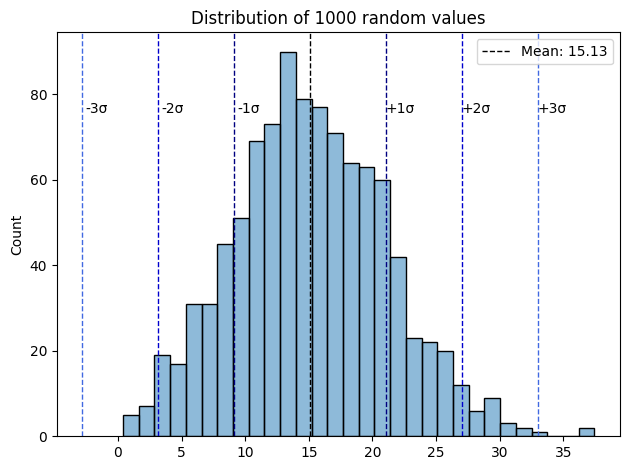

In [7]:
#Apply function
display_std(response_time)

The function calculates the variance and the standard deviation and displays intervals of ±1, ±2, and ±3 standard deviations from the mean.
Why does this matter? There is a statistical rule that relates to the standard deviation of the data.

The empirical rule, also known as the three-sigma rule or the 68-95-99.7 rule, is a statistical theorem stating that for a normal distribution:
* Approximately 68% of the data falls within one standard deviation of the mean;
* Approximately 95% of the data falls within two standard deviations of the mean;
* Approximately 99.7% of the data falls within three standard deviations of the mean.
This rule is particularly useful because it allows for quick estimates of the spread of data if one assumes a normal distribution.

In real life, the empirical rule is applied in:

* **Quality Control:** Predicting product defects within ±3 standard deviations in manufacturing processes.
* **Finance:** Assessing investment risks based on the distribution of returns.
* **Psychology:** Categorizing IQ scores to determine cognitive abilities.
* **Healthcare:** Identifying unusual blood pressure or cholesterol levels in patients.

Variance measures the spread of a set of numbers, and while it isn't represented visually on a histogram, the standard deviation — which is derived from the variance — can be. The standard deviation is depicted on a histogram, showing how data clusters around the mean.

### Outliers

<img src='images/outliers.png'>

Let's observe how variance metrics are affected by outliers. 

We've got a function called `remove_outliers` that kicks outliers out of our data using something called the interquartile range (IQR). 

Next up, we’ll whip up some data and throw in a few outliers just to see what happens. 

We calculate the metrics for the initial and cleaned data and then compare the results. 

Plotting the data will give us a clear visual of what's changed.

Mean of data with outliers: 15.20; Mean of data without outliers: 15.06.
Variance of data with outliers: 36.84; Variance of data without outliers: 34.29.
STD of data with outliers: 6.07; STD of data without outliers: 5.86.


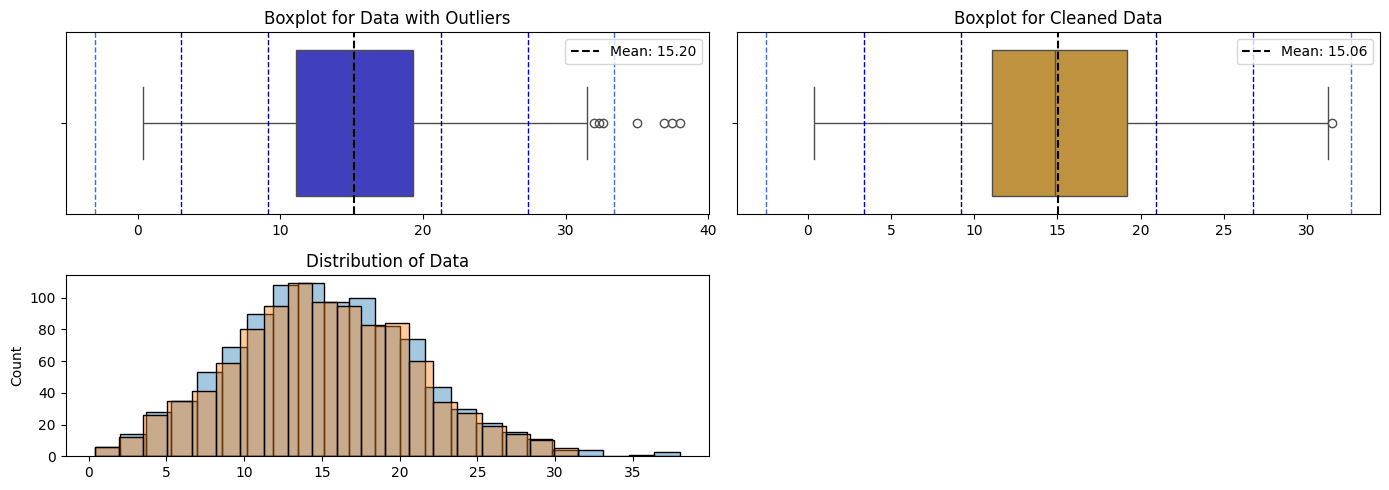

In [8]:
np.random.seed(0)  # For reproducibility

#Write a function to remove outliers with IQR method
def remove_outliers(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return data[(data >= lower_bound) & (data <= upper_bound)]

#---------------------------------------------------------------------------------------------------------------------------------------

#Add outliers to response_time data. I add several values as outliers, since they are relatively large for initial data values
data_with_outliers = np.concatenate([response_time, [27, 35, 38, 32]])

# Remove outliers. We apply the function remove_outliers to the initial dataset and store the result in the clean_data
cleaned_data = remove_outliers(data_with_outliers)

#---------------------------------------------------------------------------------------------------------------------------------------

#Print metrics out
print(f"\033[1mMean of data with outliers:\033[0m {data_with_outliers.mean():.2f}; \033[1mMean of data without outliers:\033[0m {cleaned_data.mean():.2f}.")
print(f"\033[1mVariance of data with outliers:\033[0m {np.var(data_with_outliers, ddof=1):.2f}; \033[1mVariance of data without outliers:\033[0m {np.var(cleaned_data, ddof=1):.2f}.")
print(f"\033[1mSTD of data with outliers:\033[0m {np.std(data_with_outliers, ddof=1):.2f}; \033[1mSTD of data without outliers:\033[0m {np.std(cleaned_data, ddof=1):.2f}.")

#---------------------------------------------------------------------------------------------------------------------------------------

#Data plotting function
def add_std_lines(ax, data, colors):
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    ax.axvline(mean, color='black', linestyle='--', label=f'Mean: {mean:.2f}')
    for i, color in zip(range(1, 4), colors):
        ax.axvline(mean + i * std, color=color, linestyle='dashed', linewidth=1)
        ax.axvline(mean - i * std, color=color, linestyle='dashed', linewidth=1)
    ax.legend()

# Plot data
fig, axs = plt.subplots(2, 2, figsize=(14, 5))
axs[1, 1].remove()  # Remove the extra subplot

# Boxplots
sns.boxplot(x=data_with_outliers, color='blue', saturation=0.5, ax=axs[0, 0], orient='h')
sns.boxplot(x=cleaned_data, color='orange', saturation=0.5, ax=axs[0, 1], orient='h')

# Histograms
sns.histplot(x=data_with_outliers, alpha=0.4, ax=axs[1, 0])
sns.histplot(x=cleaned_data, alpha=0.4, ax=axs[1, 0])

# Add lines for mean and STD
colors = ['navy', 'mediumblue', 'royalblue']
add_std_lines(axs[0, 0], data_with_outliers, colors)
add_std_lines(axs[0, 1], cleaned_data, colors)

# Add titles
axs[0, 0].set_title('Boxplot for Data with Outliers')
axs[0, 1].set_title('Boxplot for Cleaned Data')
axs[1, 0].set_title('Distribution of Data')

plt.tight_layout()
plt.show()

The inclusion of outliers in the dataset has a noticeable effect on the measures of central tendency and spread. When outliers are present, the mean of the data is slightly higher at 10.04 compared to 9.92 when outliers are removed. This indicates that outliers do have an effect on the mean, but it is not overly significant in our case.

On the other hand, the impact of outliers on the measures of spread, such as variance and standard deviation, is more pronounced. With outliers, the variance is 35.92, and the standard deviation is 5.99. Without outliers, these measures decrease to 31.77 for variance and 5.64 for standard deviation, respectively. These changes confirm that outliers contribute more substantially to the dispersion in the dataset, leading to greater variability as measured by both variance and standard deviation. This is because calculating the standard deviation involves squaring the differences from the mean, which amplifies the effect of outliers. 

The inclusion of outliers in the dataset noticeably affects measures of central tendency and spread. For instance, when outliers are present, the mean of the data is approximately 10.04, slightly higher than the mean of 9.92 after outliers are removed. This indicates that while outliers affect the mean, the impact in this case is relatively small.

The effect of outliers on measures of spread is more substantial. For example, the variance and standard deviation are noticeably higher when outliers are included, illustrating how outliers contribute to increased variability in the dataset. This is expected, as the standard deviation calculation squares the differences from the mean, which emphasizes the impact of outliers.

### Distribution form matters

<img src='images/distribution.png'>

Let's observe how the form of the distribution affects the variance metrics. 
Here, I use three datasets: one follows a normal distribution (`normal_data`), the second follows an exponential distribution (`skewed_data`), and the third follows a uniform distribution (`uniform_data`).

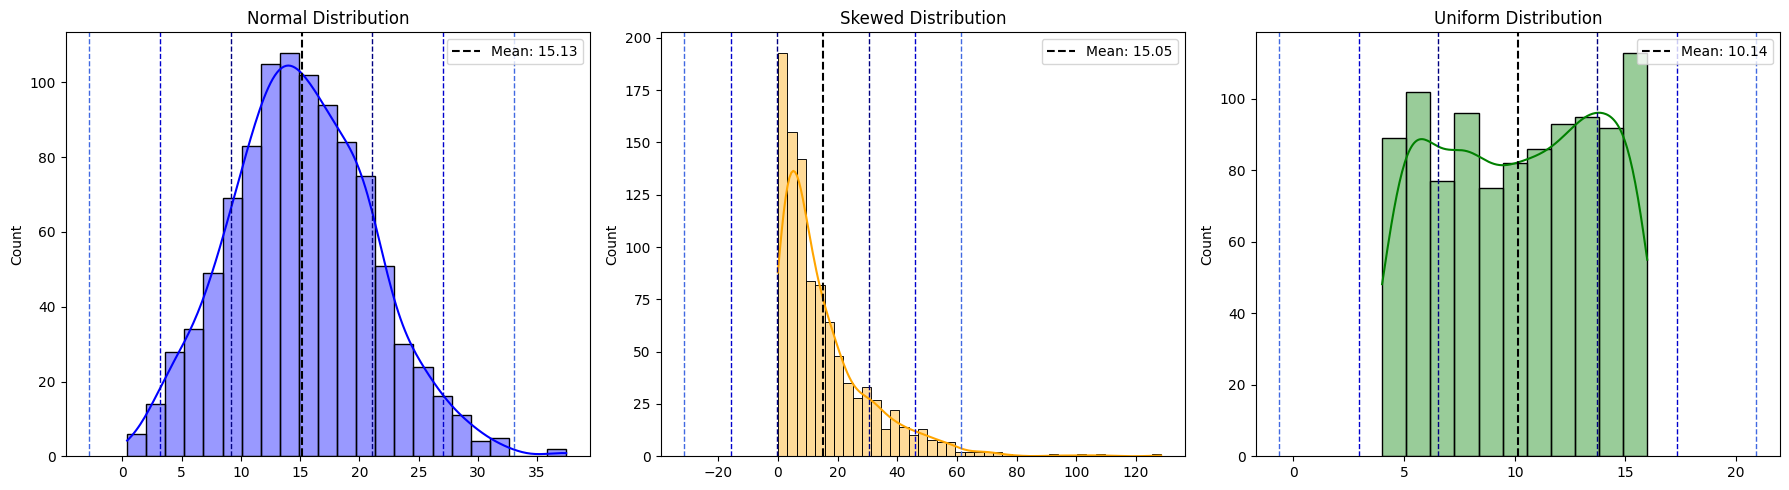

Normal Distribution - Mean: 15.13, Variance: 35.64, Standard Deviation: 5.97
Skewed Distribution - Mean: 15.05, Variance: 238.52, Standard Deviation: 15.44
Uniform Distribution - Mean: 10.14, Variance: 12.88, Standard Deviation: 3.59


In [9]:
np.random.seed(0)  # For reproducibility

# Generate a normally distributed dataset
normal_data = response_time
# Generate a skewed dataset
skewed_data = np.random.exponential(scale=15.0, size=1000)  # Exponential distribution is skewed
# Generate an uniform dataset
uniform_data = np.random.uniform(low=4, high=16, size=1000)

#---------------------------------------------------------------------------------------------------------------------------------------

# Function to calculate metrics
def calculate_metrics(data):
    return {
        'mean': np.mean(data),
        'variance': np.var(data, ddof=1),
        'std': np.std(data, ddof=1)
    }

# Calculate metrics for each dataset
metrics_normal = calculate_metrics(normal_data)
metrics_skewed = calculate_metrics(skewed_data)
metrics_uniform = calculate_metrics(uniform_data)

#---------------------------------------------------------------------------------------------------------------------------------------

# Plotting function
def plot_distribution(ax, data, mean, std, title, color):
    sns.histplot(data, kde=True, color=color, alpha=0.4, ax=ax)
    ax.set_title(title)
    ax.axvline(mean, color='black', linestyle='--', label=f'Mean: {mean:.2f}')
    
    # Add lines for std
    for i, line_color in zip(range(1, 4), ['navy', 'mediumblue', 'royalblue']):
        ax.axvline(mean + i * std, color=line_color, linestyle='dashed', linewidth=1)
        ax.axvline(mean - i * std, color=line_color, linestyle='dashed', linewidth=1)
        
    ax.legend(loc='upper right')


# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot each distribution using the metrics from the calculate_metrics function
plot_distribution(axs[0], normal_data, metrics_normal['mean'], metrics_normal['std'], 'Normal Distribution', 'blue')
plot_distribution(axs[1], skewed_data, metrics_skewed['mean'], metrics_skewed['std'], 'Skewed Distribution', 'orange')
plot_distribution(axs[2], uniform_data, metrics_uniform['mean'], metrics_uniform['std'], 'Uniform Distribution', 'green')

plt.tight_layout()
plt.show()

#---------------------------------------------------------------------------------------------------------------------------------------

# Print the metrics using the values from the calculate_metrics function
print(f"\033[1mNormal Distribution\033[0m - Mean: {metrics_normal['mean']:.2f}, Variance: {metrics_normal['variance']:.2f}, Standard Deviation: {metrics_normal['std']:.2f}")
print(f"\033[1mSkewed Distribution\033[0m - Mean: {metrics_skewed['mean']:.2f}, Variance: {metrics_skewed['variance']:.2f}, Standard Deviation: {metrics_skewed['std']:.2f}")
print(f"\033[1mUniform Distribution\033[0m - Mean: {metrics_uniform['mean']:.2f}, Variance: {metrics_uniform['variance']:.2f}, Standard Deviation: {metrics_uniform['std']:.2f}")

**Normal Distribution:**
* Variance and standard deviation are influenced by the data's spread around the central peak.
* The distribution is symmetrical with the mean, median, and mode all at the center.
* Typically, the majority of the data points fall close to the mean, resulting in a lower variance compared to a uniform distribution of the same range.

The variance is: 
  $$
  \sigma^2
  $$
The normal distribution is defined by two parameters: the mean (μ) and the standard deviation (σ). This distribution is symmetrical, making the general variance formula, mentioned above, applicable.
____________________________________________________________________________________________________________________________________________

**Uniform Distribution:**
- In a uniform distribution, the variance is directly related to the range (the difference between the maximum and minimum values, \(b - a\)), and it is calculated using the formula:
  $$
  \sigma^2 = \frac{(b - a)^2}{12}
  $$
  This formula reflects how the even spread of values across the range from \(a\) to \(b\) influences the variance.

- The standard deviation, derived from the variance, illustrates the data's spread in a uniform distribution. This is distinct from a normal distribution, where the spread is determined by how densely the data clusters around the mean.

For a uniform distribution spanning from point \(a\) to point \(b\), the variance highlights the uniformity of the spread, providing a measure of how far the data stretches across the range.
____________________________________________________________________________________________________________________________________________

**Exponential Distribution:**
* Both the variance (\(\sigma^2\)) and the standard deviation (\(\sigma\)) are influenced by the rate parameter (\(\lambda\)), with the variance and the standard deviation calculated as:
$$
 \sigma^2 = \frac{1}{\lambda^2}\
 $$  and
$$ 
\sigma = \frac{1}{\lambda}\
$$.
* This distribution is characterized by its skewness, with a tail that extends towards higher values. The rate parameter (\(\lambda\)) significantly impacts the spread of the data, which in turn affects the variance and standard deviation. Unlike a normal distribution, which is symmetrical, the exponential distribution's skewness means its variance and standard deviation can vary widely based on \(\lambda\).


For all distributions mentioned above, as well as for the others, the standard deviation calculated as square root of variance:
  $$
  \sigma = \sqrt{\sigma^2}
  $$

Note: For the same range of values, a uniform distribution generally has a higher variance and standard deviation than a normal distribution because its values are spread evenly across the entire range (cause every value within the range has an equal probability of occurrence), while values in a normal distribution are concentrated around the mean. An exponential distribution, determined by its rate parameter (λ), often exhibits greater variance and standard deviation due to its skewness, especially with a lower λ.

By the way, let's take a closer look at how the values of distribution parameters affect variance and standard deviation.

### Parameter Value Impact on Distribution Spread Metrics

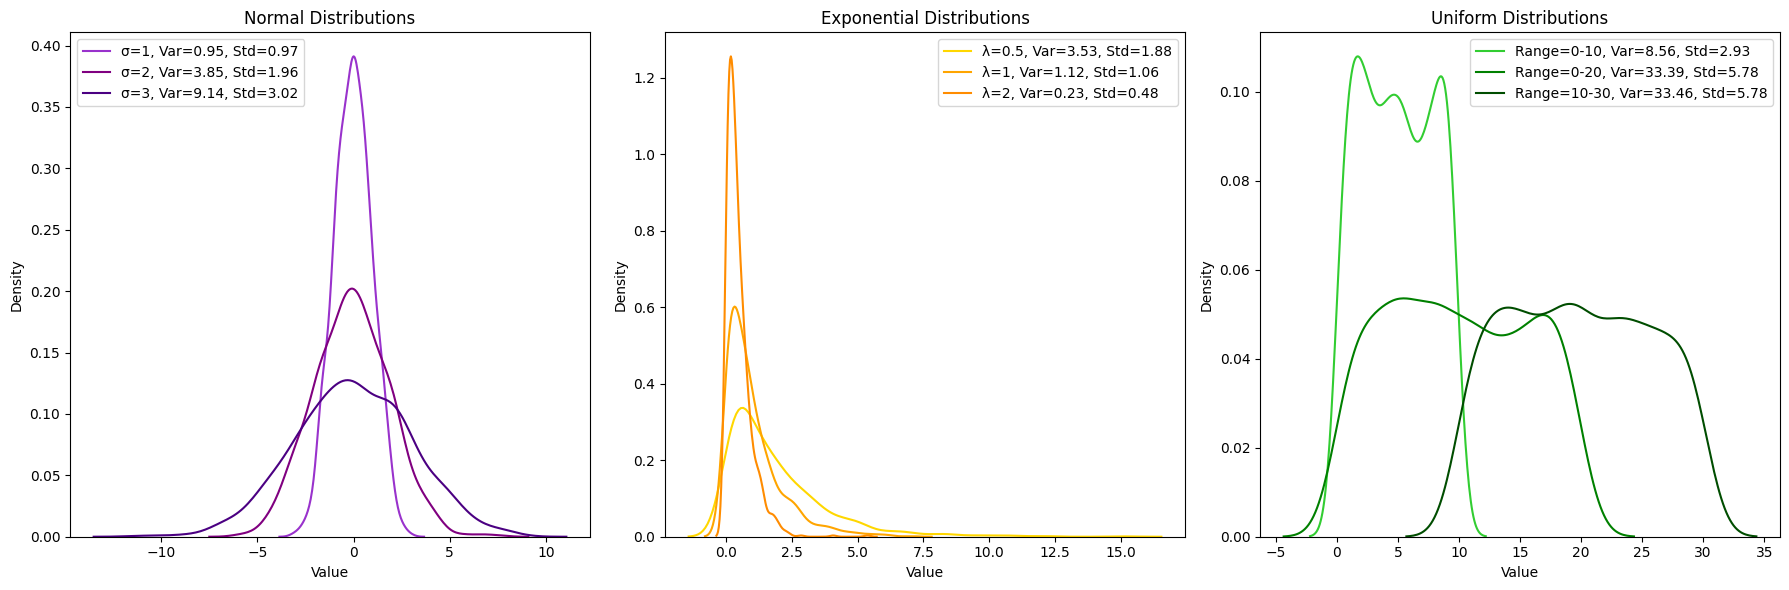

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration for the three distribution types with color palettes
dist_configs = {
    'Normal': {
        'params': [1, 2, 3],
        'dist_func': lambda param: np.random.normal(scale=param, size=1000),
        'colors': ['#9932CC', '#800080', '#4B0082'],  
        'param_label': 'σ'
    },
    'Exponential': {
        'params': [0.5, 1, 2],
        'dist_func': lambda param: np.random.exponential(scale=1/param, size=1000),
        'colors': ['#FFD700', '#FFA500', '#FF8C00'],  
        'param_label': 'λ'
    },
    'Uniform': {
        'params': [(0, 10), (0, 20), (10, 30)],
        'dist_func': lambda param: np.random.uniform(low=param[0], high=param[1], size=1000),
        'colors': ['#32CD32', '#008000', '#004D00'],  
        'param_label': 'Range'}}

plt.figure(figsize=(18, 6))

for i, (dist_type, config) in enumerate(dist_configs.items()):
    ax = plt.subplot(1, 3, i + 1)
    for param, color in zip(config['params'], config['colors']):
        # Generate data using the distribution-specific function
        data = config['dist_func'](param)
        
        # Calculate variance and standard deviation
        var = np.var(data, ddof=0)
        std = np.std(data, ddof=0)
        
        # Define the parameter label
        param_label = f"{config['param_label']}={param}" if not isinstance(param, tuple) else f"{config['param_label']}={param[0]}-{param[1]}"
        
        # Plotting with specified color and parameter label
        sns.kdeplot(data, color=color, label=f'{param_label}, Var={var:.2f}, Std={std:.2f}')
        
    plt.title(f'{dist_type} Distributions')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()


The image shows three plots of exponential, uniform, and normal distributions, each with three curves corresponding to different parameters for these distributions.

* The **Exponential Distribution** plot shows how the density curves become less spread out as the rate parameter λ increases, indicating a decrease in variance and standard deviation.
* The **Uniform Distribution** plot illustrates that as the range between a and b widens, the distribution flattens and spreads out, leading to an increase in both variance and standard deviation.
* The **Normal Distribution** plot demonstrates that as the standard deviation σ grows, the distribution curve widens, resulting in a larger variance, which is reflected in the flatter and broader curves.

<img src='images/data_type.png'>

### Data types:
Finally, let's see how data type can affect variance and standard deviation:

**Numerical Data:**
* Directly applicable to both discrete and continuous numerical data.
* Calculations rely on numerical differences from the mean.

**Categorical Data:**
* Not suitable for direct application because these measures depend on numerical values.
* Ordinal data can sometimes be approximated numerically, but this may not always yield meaningful insights.

<img src='images/key_points.png'>

**Key Points to Consider:**

**Outliers:** Outliers greatly impact variance and standard deviation due to the squared differences from the mean used in their calculations. A few extreme values can disproportionately inflate both measures.

**Distribution Shape:** In symmetric distributions, variance and standard deviation clearly show data spread. For skewed distributions, like exponential, these measures are skewed by the tail. In uniform distributions, they evenly reflect data spread since all values are equally likely.

**Data Type:** Suitable for numerical data (both discrete and continuous), variance and standard deviation are not directly applicable to categorical data, as these measures rely on numerical differences from the mean.

<img src='images/examples.png'>

* Product Analytics: Session lengths - to capture the breadth of user engagement, useful for spotting highly variable usage patterns.
* Product Analytics: Conversion rates - to assess the consistency of user conversions across different marketing campaigns.
* Product Analytics: Page load times - to quantify the variability in user experience, highlighting pages with inconsistent load times.
* Product Analytics: Weekly sales - to gauge sales stability, identifying weeks with significant fluctuations.

* General: Annual rainfall - to understand precipitation variability, useful in environmental studies.
* General: Commute times - to measure the consistency of daily commutes, useful in urban planning.
* General: Participant heart rates in a study - to capture the spread of physiological responses, useful in health research.
* General: Energy consumption - to assess variability in household energy use, useful in efficiency studies.




There are some cases when using either variance or STD can be more preferrable.

**When to Use Variance:**
* Theoretical Work: Preferred in statistical models due to its mathematical properties, like the ease of adding variances from independent variables.
* Different Units: Useful when comparing data across different measurement units in theoretical analyses.

**When to Use Standard Deviation:**
* Understanding Data: More intuitive, as it's in the same units as the data, making it easier to grasp data spread.
* Practical Analysis: Ideal for empirical analysis to describe data variability around the mean.
* Normal Distribution: Key in normally distributed data for applying rules like 68-95-99.7% for data distribution around the mean.
* Quality Control: Used in setting quality standards in manufacturing, as it clearly shows how far values can deviate from the target.


<img src='images/conclusion.png'>

And that's a wrap on variance and standard deviation! These are key starting points for understanding how data spreads out.
Thanks for walking through this with me. Your feedback is always welcome!
Happy wombalyzing!
<pre>                                                                                                            
     @@                 @@      
   @  .@@@            @@@  @@ 
  @@  @@  @@@@@@@@@@@   @@  @ 
   @@@@*                *@@@   
     @.                   @    
    @@    @@        @@    @@    
    @,       @@@@@@        @   
    @         @@@@         @  
     @      \__/\__/      @   
       @@@            @@@       
           @@@@@@@@@@            
